<a href="https://colab.research.google.com/github/addy9051/Spoon-Knife/blob/main/Network_anomaly_multinomial_attacks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [54]:
!gdown 1B3XrHjZiwwXPr052_ZR7AN9Faj3ZRwGF

Downloading...
From: https://drive.google.com/uc?id=1B3XrHjZiwwXPr052_ZR7AN9Faj3ZRwGF
To: /content/Network_anomaly_data.csv
100% 17.7M/17.7M [00:00<00:00, 217MB/s]


In [55]:
df = pd.read_csv('Network_anomaly_data.csv')
pd.set_option('display.max_columns', None)

## High level overview of the dataset

####Inspect the top 5 rows

In [56]:
df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,numoutboundcmds,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


####Get the basic overview of the data

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   duration                125973 non-null  int64  
 1   protocoltype            125973 non-null  object 
 2   service                 125973 non-null  object 
 3   flag                    125973 non-null  object 
 4   srcbytes                125973 non-null  int64  
 5   dstbytes                125973 non-null  int64  
 6   land                    125973 non-null  int64  
 7   wrongfragment           125973 non-null  int64  
 8   urgent                  125973 non-null  int64  
 9   hot                     125973 non-null  int64  
 10  numfailedlogins         125973 non-null  int64  
 11  loggedin                125973 non-null  int64  
 12  numcompromised          125973 non-null  int64  
 13  rootshell               125973 non-null  int64  
 14  suattempted         

**Insight:**
- most of the columns are numerics
- duration indicates time in seconds for each connection
- all the columns which are float64 are percentage rate of already present features: feature engineering of them will be done later
- attack column contains the classes of attacks that will be out target variable for classification

#### **Missing value check**

In [58]:
df.isna().sum()

,0
duration,0
protocoltype,0
service,0
flag,0
srcbytes,0
dstbytes,0
land,0
wrongfragment,0
urgent,0
hot,0


- No missing values in data

#### **Feature Engineering: Count from percentage**

In [59]:
#percent of count
df['serrorcount'] = df['serrorrate']*df['count']
df['rerrorcount'] = df['rerrorrate']*df['count']
df['samesrvcount'] = df['samesrvrate']*df['count']
df['diffsrvcount'] = df['diffsrvrate']*df['count']

#percent of srvcount
df['srvserrorcount'] = df['srvserrorrate']*df['srvcount']
df['srvrerrorcount'] = df['srvrerrorrate']*df['srvcount']
df['srvdiffhostcount'] = df['srvdiffhostrate']*df['srvcount']

#percent of dsthostcount
df['dsthostsamesrvcount'] = df['dsthostsamesrvrate']*df['dsthostcount']
df['dsthostdiffsrvcount'] = df['dsthostdiffsrvrate']*df['dsthostcount']
df['dsthostserrorcount'] = df['dsthostserrorrate']*df['dsthostcount']
df['dsthostrerrorcount'] = df['dsthostrerrorrate']*df['dsthostcount']


#percent of dsthostsrvcount
df['dsthostsamesrcportcount'] = df['dsthostsamesrcportrate']*df['dsthostsrvcount']
df['dsthostsrvdiffhostcount'] = df['dsthostsrvdiffhostrate']*df['dsthostsrvcount']
df['dsthostsrvserrorcount'] = df['dsthostsrvserrorrate']*df['dsthostsrvcount']
df['dsthostsrvrerrorcount'] = df['dsthostsrvrerrorrate']*df['dsthostsrvcount']


In [60]:
df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,numoutboundcmds,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag,serrorcount,rerrorcount,samesrvcount,diffsrvcount,srvserrorcount,srvrerrorcount,srvdiffhostcount,dsthostsamesrvcount,dsthostdiffsrvcount,dsthostserrorcount,dsthostrerrorcount,dsthostsamesrcportcount,dsthostsrvdiffhostcount,dsthostsrvserrorcount,dsthostsrvrerrorcount
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,0.0,0.0,2.00,0.00,0.0,0.0,0.00,25.5,4.50,0.0,7.5,4.25,0.0,0.00,0.00
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,0.0,0.0,1.04,1.95,0.0,0.0,0.00,0.0,153.00,0.0,0.0,0.88,0.0,0.00,0.00
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,123.0,0.0,6.15,8.61,6.0,0.0,0.00,25.5,12.75,255.0,0.0,0.00,0.0,26.00,0.00
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,1.0,0.0,5.00,0.00,1.0,0.0,0.00,30.0,0.00,0.9,0.0,7.65,10.2,2.55,2.55
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,0.0,0.0,30.00,0.00,0.0,0.0,2.88,255.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00


In [61]:
#drop the columns percentage columns
df.drop(columns=['serrorrate', 'rerrorrate', 'samesrvrate', 'diffsrvrate', 'srvserrorrate', 'srvrerrorrate', 'srvdiffhostrate', 'dsthostsamesrvrate', 'dsthostdiffsrvrate', 'dsthostserrorrate', 'dsthostrerrorrate', 'dsthostsamesrcportrate', 'dsthostsrvdiffhostrate', 'dsthostsrvserrorrate',  'dsthostsrvrerrorrate'], inplace=True)

In [62]:
df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,numoutboundcmds,ishostlogin,isguestlogin,count,srvcount,dsthostcount,dsthostsrvcount,attack,lastflag,serrorcount,rerrorcount,samesrvcount,diffsrvcount,srvserrorcount,srvrerrorcount,srvdiffhostcount,dsthostsamesrvcount,dsthostdiffsrvcount,dsthostserrorcount,dsthostrerrorcount,dsthostsamesrcportcount,dsthostsrvdiffhostcount,dsthostsrvserrorcount,dsthostsrvrerrorcount
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,150,25,normal,20,0.0,0.0,2.00,0.00,0.0,0.0,0.00,25.5,4.50,0.0,7.5,4.25,0.0,0.00,0.00
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,255,1,normal,15,0.0,0.0,1.04,1.95,0.0,0.0,0.00,0.0,153.00,0.0,0.0,0.88,0.0,0.00,0.00
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,255,26,neptune,19,123.0,0.0,6.15,8.61,6.0,0.0,0.00,25.5,12.75,255.0,0.0,0.00,0.0,26.00,0.00
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,30,255,normal,21,1.0,0.0,5.00,0.00,1.0,0.0,0.00,30.0,0.00,0.9,0.0,7.65,10.2,2.55,2.55
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,255,255,normal,21,0.0,0.0,30.00,0.00,0.0,0.0,2.88,255.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration                 125973 non-null  int64  
 1   protocoltype             125973 non-null  object 
 2   service                  125973 non-null  object 
 3   flag                     125973 non-null  object 
 4   srcbytes                 125973 non-null  int64  
 5   dstbytes                 125973 non-null  int64  
 6   land                     125973 non-null  int64  
 7   wrongfragment            125973 non-null  int64  
 8   urgent                   125973 non-null  int64  
 9   hot                      125973 non-null  int64  
 10  numfailedlogins          125973 non-null  int64  
 11  loggedin                 125973 non-null  int64  
 12  numcompromised           125973 non-null  int64  
 13  rootshell                125973 non-null  int64  
 14  suat

In [64]:
df.nunique().sort_values(ascending = True)

,0
numoutboundcmds,1
isguestlogin,2
ishostlogin,2
rootshell,2
loggedin,2
land,2
numshells,3
suattempted,3
protocoltype,3
wrongfragment,3


In [65]:
#dropping columns not relevant
dropped_cols = ['numoutboundcmds', 'isguestlogin', 'ishostlogin', 'loggedin', 'land', 'numshells']

df.drop(columns = dropped_cols, inplace = True)

###**Target Variable (Overview)**

#### **Types of Attacks**

In [66]:
df.attack.unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

**Insights**
- stating the research paper which has mined this data
["https://www.researchgate.net/publication/228808098_Cost-Based_modeling_and_evaluation_for_data_mining_with_application_to_fraud_and_intrusion_detection_Results_from_the_JAM_project"]

- attacks fall into four main categories:

  - DOS: denial-of-service, e.g. syn flood;
  - R2L: unauthorized access from a remote machine, e.g. guessing password;
  - U2R: unauthorized access to local superuser (root) privileges, e.g., various ``buffer overflow'' attacks;
  - probing: surveillance and other probing, e.g., port scanning.

- dos: back, land, neptune, teardrop, pod, smurf
- u2r: buffer_overflow, rootkit, loadmodule, perl
- r2l: ftp_write, guess_passwd, imap, multihop, phf, spy, warezclient, warezmaster
- probe: ipsweep, nmap, portsweep, satan

- we will engineer another category called safe to group all the non-attack normal records
- finally to make a binary classifier model we will groups all the "attacks" as attack and all the safe records as "genuine"

###**Categorical Variable (Overview)**

#### **Types of Flags**

In [67]:
df['flag'].unique()

array(['SF', 'S0', 'REJ', 'RSTR', 'SH', 'RSTO', 'S1', 'RSTOS0', 'S3',
       'S2', 'OTH'], dtype=object)

In the context of detecting potential network attacks, the grouping of flag statuses are as follows:
- "Normal" Flag Statuses:

  - SF (Synchronize/Finish)
  - S3 (State 3)

- "Error" Flag Statuses:

  - S0 (State 0)
  - S1 (State 1)
  - S2 (State 2)
  - SH (Synchronize/Half-open)
  - REJ (Rejected)
  - RSTR (Reset/Received)
  - RSTO (Reset/Sent)
  - RSTOS0 (Reset/Sent State 0)
  - OTH (Other)

**Reasoning**:
Normal Flag Statuses:

- SF and S3 represent successfully established and completed connections, which are typically indicative of normal network behavior.

Potentially Suspicious or Error Flag Statuses:

- S0, S1, S2: While these can be normal in small numbers, a large volume of connections stuck in these states could indicate scanning activities or SYN flood attacks.
- SH: Half-open connections in large numbers could suggest SYN flood attacks.
REJ: Numerous rejected connections might indicate port scanning or brute force attempts.
- RSTR, RSTO, RSTOS0: While resets can occur normally, an unusual number of resets might suggest port scanning or attempts to exploit vulnerabilities.
- OTH: Undefined states could be indicative of protocol anomalies or crafted packets used in attacks.

In this context, we're being more conservative in what we consider "normal." The key is to look for patterns and volumes that deviate from the baseline network behavior. For instance:

A high number of S0, S1, or SH states could indicate a SYN flood attack.
Numerous REJ flags might suggest port scanning activities.
An unusual spike in reset flags (RSTR, RSTO, RSTOS0) could indicate attempted exploits.
A sudden increase in OTH flags might suggest the use of crafted packets in an attack.

It's crucial to analyze these flags in conjunction with other network data, such as source/destination IP addresses, ports, and overall traffic patterns. What's considered suspicious can vary based on the specific network environment and typical usage patterns.

###**Types of Protocol**

In [68]:
df['protocoltype'].unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

###**Types of Service (Destination Network Service)**

In [69]:
df['service'].unique()

array(['ftp_data', 'other', 'private', 'http', 'remote_job', 'name',
       'netbios_ns', 'eco_i', 'mtp', 'telnet', 'finger', 'domain_u',
       'supdup', 'uucp_path', 'Z39_50', 'smtp', 'csnet_ns', 'uucp',
       'netbios_dgm', 'urp_i', 'auth', 'domain', 'ftp', 'bgp', 'ldap',
       'ecr_i', 'gopher', 'vmnet', 'systat', 'http_443', 'efs', 'whois',
       'imap4', 'iso_tsap', 'echo', 'klogin', 'link', 'sunrpc', 'login',
       'kshell', 'sql_net', 'time', 'hostnames', 'exec', 'ntp_u',
       'discard', 'nntp', 'courier', 'ctf', 'ssh', 'daytime', 'shell',
       'netstat', 'pop_3', 'nnsp', 'IRC', 'pop_2', 'printer', 'tim_i',
       'pm_dump', 'red_i', 'netbios_ssn', 'rje', 'X11', 'urh_i',
       'http_8001', 'aol', 'http_2784', 'tftp_u', 'harvest'], dtype=object)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 37 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration                 125973 non-null  int64  
 1   protocoltype             125973 non-null  object 
 2   service                  125973 non-null  object 
 3   flag                     125973 non-null  object 
 4   srcbytes                 125973 non-null  int64  
 5   dstbytes                 125973 non-null  int64  
 6   wrongfragment            125973 non-null  int64  
 7   urgent                   125973 non-null  int64  
 8   hot                      125973 non-null  int64  
 9   numfailedlogins          125973 non-null  int64  
 10  numcompromised           125973 non-null  int64  
 11  rootshell                125973 non-null  int64  
 12  suattempted              125973 non-null  int64  
 13  numroot                  125973 non-null  int64  
 14  numf

In [71]:
df.nunique().sort_values(ascending = True)

,0
rootshell,2
protocoltype,3
wrongfragment,3
suattempted,3
urgent,4
numfailedlogins,6
numaccessfiles,10
flag,11
lastflag,22
attack,23


**Insights**
- we have created our "**attack_or_safe**" binary class to detect if the connection is an attack or genuine connection
- we have also created "**attack_categories**" a main category for the attacks  grouping the attacks


## **Summary statistics**

In [72]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,125973.0,287.144650,2.604515e+03,0.0,0.0,0.00,0.00,4.290800e+04
srcbytes,125973.0,45566.743000,5.870331e+06,0.0,0.0,44.00,276.00,1.379964e+09
dstbytes,125973.0,19779.114421,4.021269e+06,0.0,0.0,0.00,516.00,1.309937e+09
wrongfragment,125973.0,0.022687,2.535300e-01,0.0,0.0,0.00,0.00,3.000000e+00
urgent,125973.0,0.000111,1.436603e-02,0.0,0.0,0.00,0.00,3.000000e+00
hot,125973.0,0.204409,2.149968e+00,0.0,0.0,0.00,0.00,7.700000e+01
numfailedlogins,125973.0,0.001222,4.523914e-02,0.0,0.0,0.00,0.00,5.000000e+00
numcompromised,125973.0,0.279250,2.394204e+01,0.0,0.0,0.00,0.00,7.479000e+03
rootshell,125973.0,0.001342,3.660284e-02,0.0,0.0,0.00,0.00,1.000000e+00
suattempted,125973.0,0.001103,4.515438e-02,0.0,0.0,0.00,0.00,2.000000e+00


In [73]:
df.describe(include = 'object').T

,count,unique,top,freq
protocoltype,125973,3,tcp,102689
service,125973,70,http,40338
flag,125973,11,SF,74945
attack,125973,23,normal,67343


**Insights**
- duration of connections is highly varied with some taking 0 second and some as extreme as 42908 seconds
- most connections have a duration of 287 seconds
- 3 unique protocol types used
- tcp protocol type is the most frequently used
- 70 unique service (destination network service) used
- http is the most frequent service
- flag SF is the most frequent connection status

In [74]:
import pickle
df.to_pickle('data.pkl')
df = pd.read_pickle('data.pkl')

#**Basic Exploratory Data Analysis**

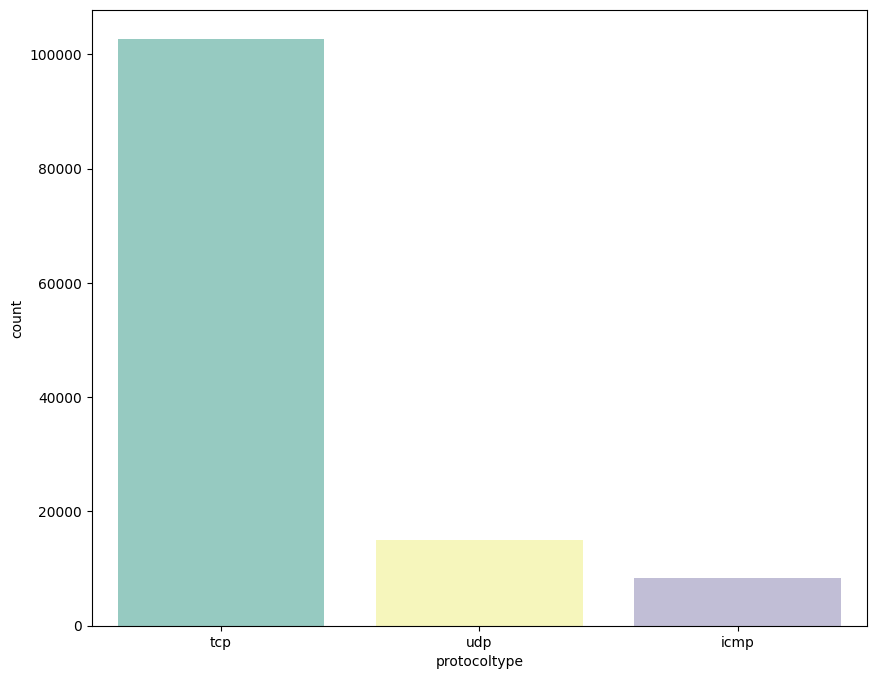

In [75]:
# Protocol type distribution
plt.figure(figsize=(10, 8))
sns.countplot(x="protocoltype",
              data=df,
              hue='protocoltype',
              palette="Set3")
plt.show()

Insight
- Most connections use tcp protocol

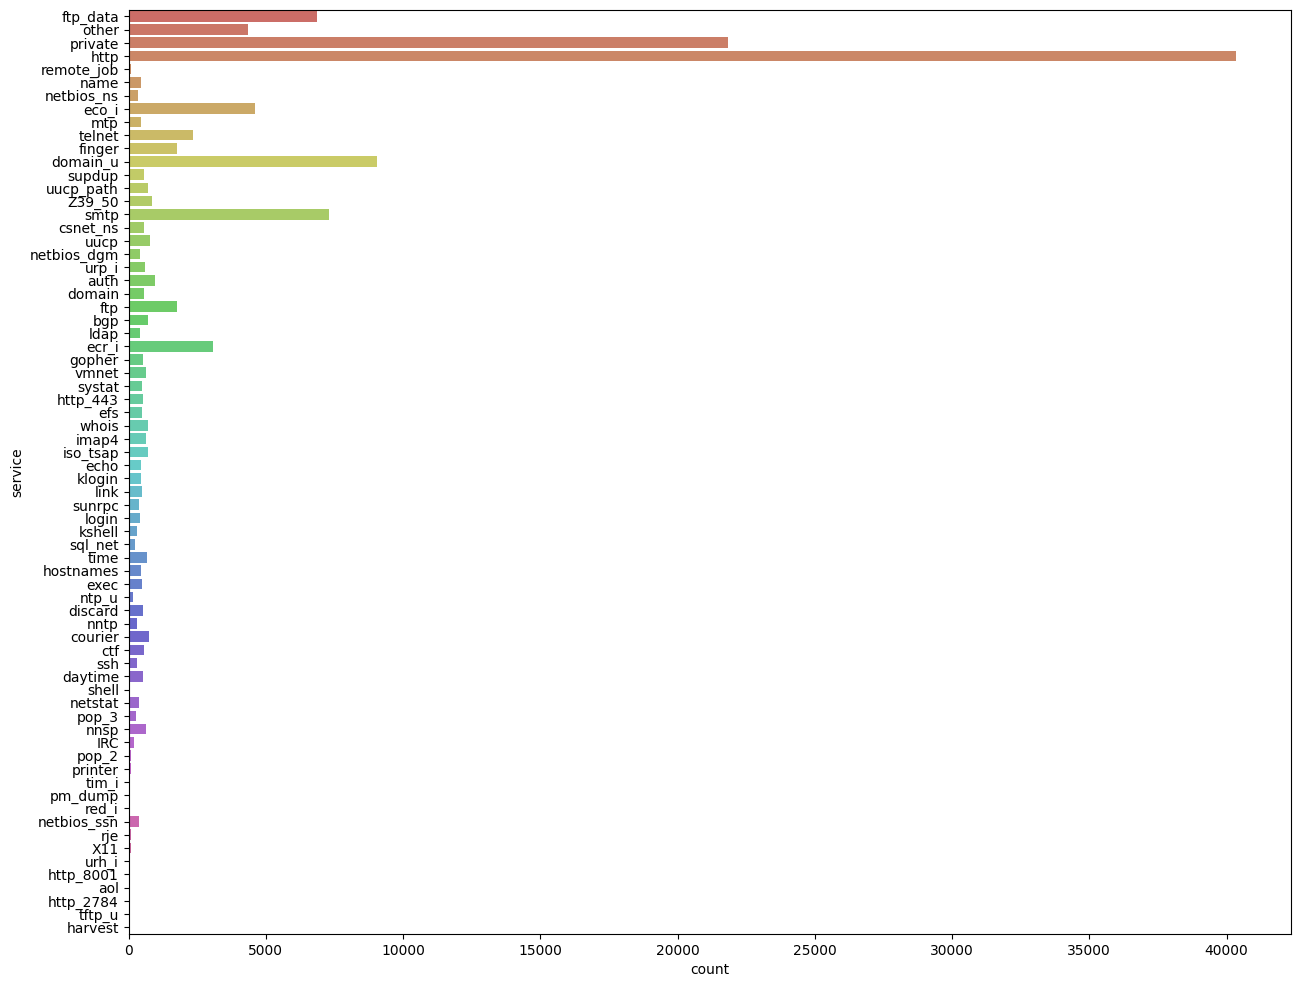

In [76]:
# service distribution
plt.figure(figsize=(15, 12))
sns.countplot(y="service", data=df, palette="hls")
plt.show()

Insight
- most services used by destination network are http, followed by private

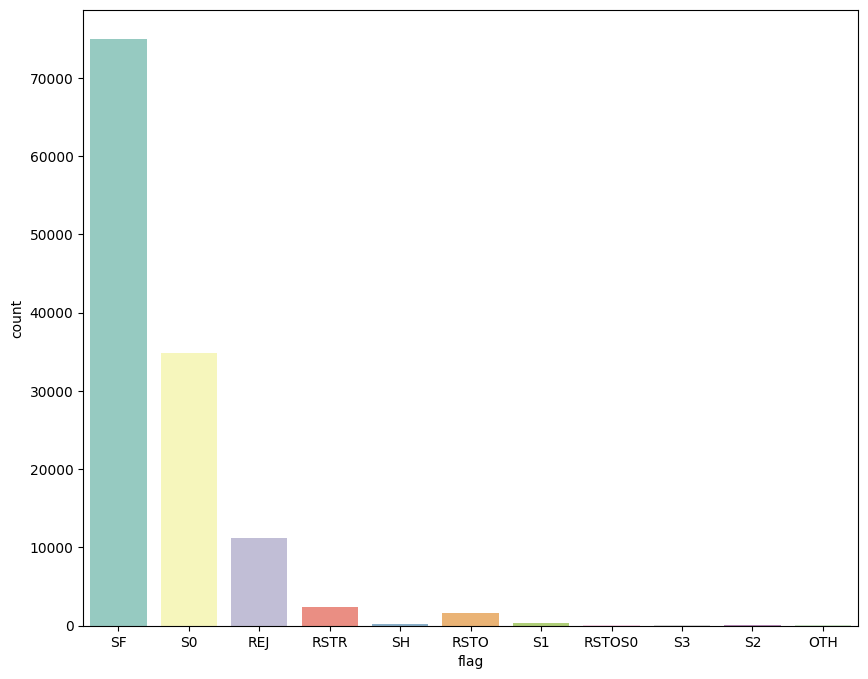

In [77]:
# flag distribution
plt.figure(figsize=(10, 8))
sns.countplot(x="flag", data=df, palette="Set3")
plt.show()

Insight
- most connections having SF flag meaning successfully established connection

In [78]:
#value counts for target variable
df.attack.value_counts()

,count
attack,
normal,67343
neptune,41214
satan,3633
ipsweep,3599
portsweep,2931
smurf,2646
nmap,1493
back,956
teardrop,892


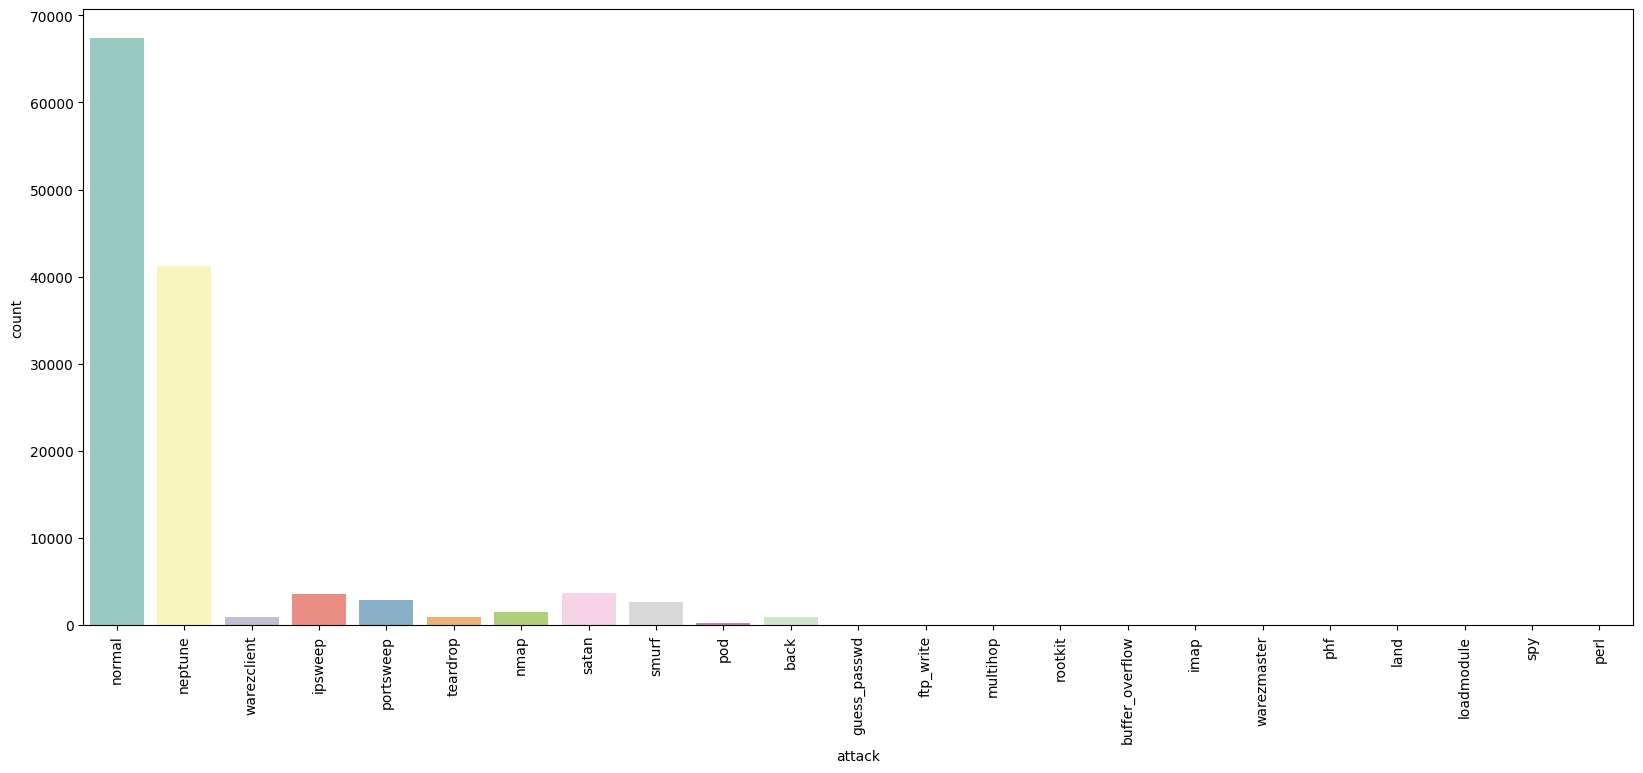

In [79]:
# flag distribution
plt.figure(figsize=(20, 8))
sns.countplot(x="attack", data=df, palette="Set3")
plt.xticks(rotation=90)
plt.show()

Insight
- most of the connections are normal
- in attacks we see neptune to be the maximum among all

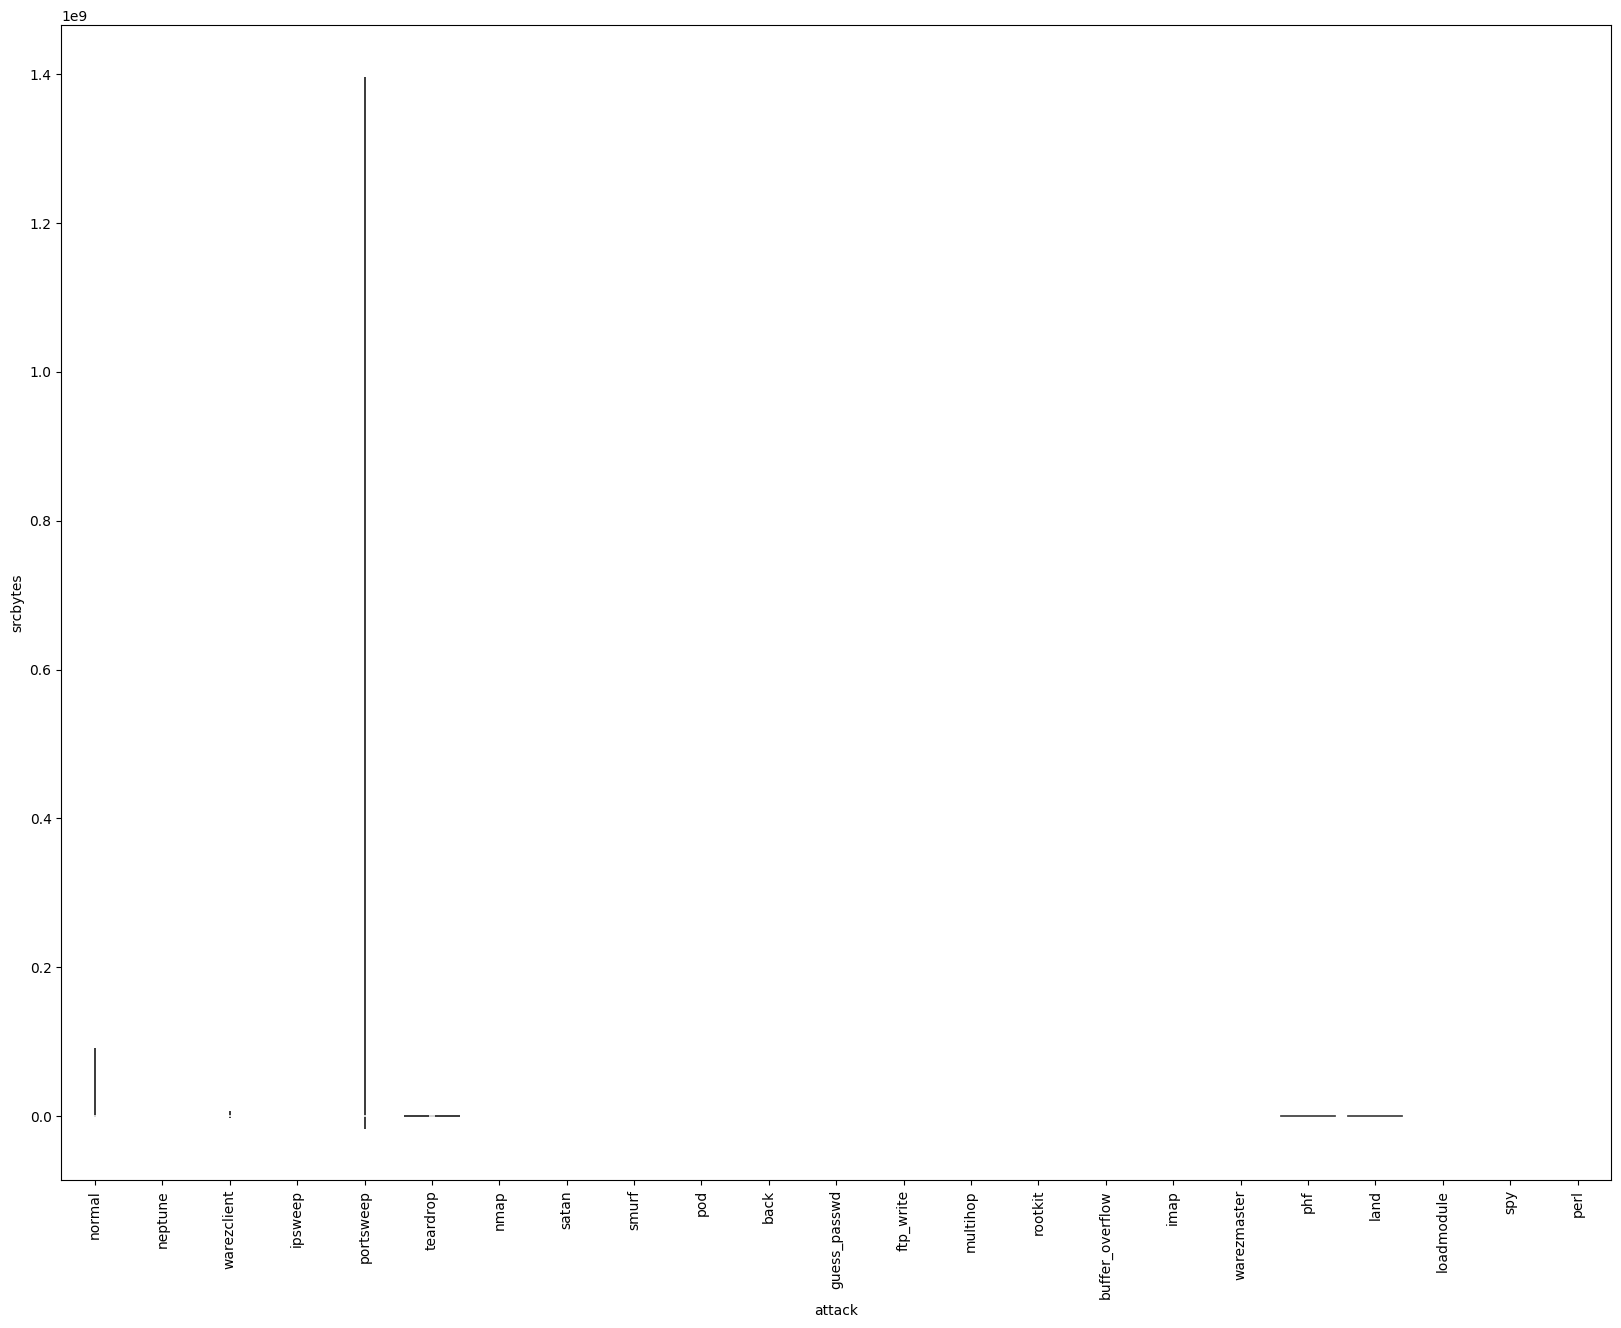

In [80]:
plt.figure(figsize=(20,15))
sns.violinplot(x="attack", y="srcbytes", data=df)
plt.xticks(rotation=90)
plt.show()

Insight
- Using srcbytes as a feature for analysis, the intrusion category "portsweep" is distinguishable from rest of the categories.

As we have relatively high number of classes, the Univariate analysis using boxplots and violin plots do not give us clear and satisfactory results.

Thus, we can go with pairplots for BiVariate Analysis or we can go with PCA/TSNE to reduce the no. of dimensions and perform Bi/Tri-Variate Analysis.

#Multivariate Analysis

In [81]:
from sklearn.manifold import TSNE

In [82]:
df_num = df.drop(['attack','protocoltype','service','flag'], axis=1)
Y = df['attack'].values

In [83]:
def tsne_func(data, label, no_components, perplexity_value, n_iter_value):

    print('TSNE with perplexity={} and no. of iterations={}'.format(perplexity_value, n_iter_value))
    tsne = TSNE(n_components=no_components, perplexity=perplexity_value, n_iter=n_iter_value)
    tsne_df1 = tsne.fit_transform(data)
    print(tsne_df1.shape)
    tsne_df1 = np.vstack((tsne_df1.T, Y)).T
    tsne_data1 = pd.DataFrame(data=tsne_df1, columns=['feature1', 'feature2', 'Output'])


    sns.FacetGrid(tsne_data1, hue='Output', height=6, aspect=2.0).map(plt.scatter, 'feature1', 'feature2').add_legend()
    plt.show()

In [84]:
# tsne_func(data=df_num, label=Y, no_components=2, perplexity_value=100, n_iter_value=500)

In [85]:
# tsne_func(data=df_num, label=Y, no_components=2, perplexity_value=50, n_iter_value=1000)

Insight:
- From the above 2 graphs, it can be concluded that the data is not linearly separable/almost linearly separable in the TSNE_transformed feature space.

#**Train Test Split**

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df.drop('attack', axis=1), df['attack'], stratify=df['attack'], test_size=0.25)

In [87]:
print('Train data')
print(X_train.shape)
print(Y_train.shape)
print('='*20)
print('Test data')
print(X_test.shape)
print(Y_test.shape)

Train data
(94479, 36)
(94479,)
Test data
(31494, 36)
(31494,)


#Vectorizing Categorical features using one-hot encoding:-
Categorical features in our dataset are:- 'protocol_type', 'service', and 'flag'.

###**Protocol Type**

In [88]:
protocol = list(X_train['protocoltype'].values)
protocol = list(set(protocol))
print('Protocol types are:', protocol)

Protocol types are: ['udp', 'icmp', 'tcp']


In [89]:
from sklearn.feature_extraction.text import CountVectorizer
one_hot = CountVectorizer(vocabulary= protocol, binary=True)
train_protocol = one_hot.fit_transform(X_train['protocoltype'].values)
test_protocol = one_hot.transform(X_test['protocoltype'].values)

In [90]:
print(train_protocol[1].toarray())
train_protocol.shape

[[0 0 1]]


(94479, 3)

###**Service**

In [91]:
service = list(X_train['service'].values)
service = list(set(service))
print('Service types are:\n', service)

Service types are:
 ['echo', 'imap4', 'urh_i', 'netbios_ns', 'klogin', 'hostnames', 'rje', 'systat', 'iso_tsap', 'discard', 'daytime', 'http', 'http_2784', 'private', 'uucp', 'nntp', 'ftp_data', 'ldap', 'eco_i', 'shell', 'ftp', 'kshell', 'efs', 'sunrpc', 'netstat', 'smtp', 'exec', 'tim_i', 'remote_job', 'netbios_ssn', 'http_443', 'X11', 'ecr_i', 'pop_2', 'tftp_u', 'other', 'printer', 'finger', 'auth', 'bgp', 'urp_i', 'time', 'login', 'telnet', 'Z39_50', 'link', 'vmnet', 'IRC', 'nnsp', 'domain_u', 'ssh', 'netbios_dgm', 'sql_net', 'pm_dump', 'courier', 'csnet_ns', 'harvest', 'mtp', 'ctf', 'red_i', 'pop_3', 'name', 'supdup', 'ntp_u', 'domain', 'gopher', 'whois', 'uucp_path']


In [92]:
from sklearn.feature_extraction.text import CountVectorizer
one_hot = CountVectorizer(vocabulary=service, binary=True)
train_service = one_hot.fit_transform(X_train['service'].values)
test_service = one_hot.transform(X_test['service'].values)

In [93]:
print(train_service[100].toarray())

[[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [94]:
train_service.shape

(94479, 68)

###**Flag**

In [95]:
flag = list(X_train['flag'].values)
flag = list(set(flag))
print('flag types are:', flag)

flag types are: ['SH', 'RSTR', 'S1', 'SF', 'RSTO', 'S3', 'OTH', 'RSTOS0', 'S2', 'S0', 'REJ']


In [96]:
from sklearn.feature_extraction.text import CountVectorizer
one_hot = CountVectorizer(binary=True)
one_hot.fit(X_train['flag'].values)
train_flag = one_hot.transform(X_train['flag'].values)
test_flag = one_hot.transform(X_test['flag'].values)

In [97]:
print(test_flag[3000].toarray())
train_flag.shape

[[0 0 1 0 0 0 0 0 0 0 0]]


(94479, 11)

In [98]:
X_train.drop(['protocoltype','service','flag'], axis=1, inplace=True)
X_test.drop(['protocoltype','service','flag'], axis=1, inplace=True)

#**Applying Standardisation on the continuous features of our dataset**

In [99]:
def feature_scaling(X_train, X_test, feature_name):

    '''
    This function performs standardisation on the features
    '''

    from sklearn.preprocessing import StandardScaler

    scaler = StandardScaler()
    scaler1 = scaler.fit_transform(X_train[feature_name].values.reshape(-1,1))
    scaler2 = scaler.transform(X_test[feature_name].values.reshape(-1,1))

    return scaler1, scaler2

**Duration**

In [100]:
duration1, duration2 = feature_scaling(X_train, X_test, 'duration')

In [101]:
print(duration1[1])

[-0.10867713]


**src_bytes**

In [102]:
src_bytes1, src_bytes2 = feature_scaling(X_train, X_test, 'srcbytes')

In [103]:
print(src_bytes1[1])

[-0.00749286]


**dst_bytes**

In [104]:
dst_bytes1, dst_bytes2 = feature_scaling(X_train, X_test, 'dstbytes')

In [105]:
print(dst_bytes1[1])

[-0.00394538]


**wrong_fragment**

In [106]:
wrong_fragment1, wrong_fragment2 = feature_scaling(X_train, X_test, 'wrongfragment')

In [107]:
print(wrong_fragment1[1])

[-0.08947893]


**urgent**

In [108]:
urgent1, urgent2 = feature_scaling(X_train, X_test, 'urgent')

In [109]:
print(urgent1[1])

[-0.00845904]


**hot**

In [110]:
hot1, hot2 = feature_scaling(X_train, X_test, 'hot')

In [111]:
print(hot1[1])

[-0.09437651]


**num_failed_logins**

In [112]:
num_failed_logins1, num_failed_logins2 = feature_scaling(X_train, X_test, 'numfailedlogins')

In [113]:
print(num_failed_logins1[1])

[21.24236804]


**num_compromised**

In [114]:
num_compromised1, num_compromised2 = feature_scaling(X_train, X_test, 'numcompromised')

In [115]:
num_compromised1[1]

array([-0.01101809])

**root_shell**

In [116]:
root_shell1, root_shell2 = feature_scaling(X_train, X_test, 'rootshell')

In [117]:
root_shell1[1]

array([-0.03683255])

**su_attempted**

In [118]:
su_attempted1, su_attempted2 = feature_scaling(X_train, X_test, 'suattempted')

In [119]:
su_attempted1[1]

array([-0.02408139])

**num_root**

In [120]:
num_root1, num_root2 = feature_scaling(X_train, X_test, 'numroot')

In [121]:
num_root1[1]

array([-0.01166389])

**num_file_creations**

In [122]:
num_file_creations1, num_file_creations2 = feature_scaling(X_train, X_test, 'numfilecreations')

In [123]:
num_file_creations1[1]

array([-0.02578568])

**num_access_files**

In [124]:
num_access_files1, num_access_files2 = feature_scaling(X_train, X_test, 'numaccessfiles')

In [125]:
num_access_files1[1]

array([-0.04159723])

**srv_count**

In [126]:
srv_count1, srv_count2 = feature_scaling(X_train, X_test, 'srvcount')

In [127]:
srv_count1[1]

array([-0.36816487])

**serror_count**

In [128]:
serror_count1, serror_count2 = feature_scaling(X_train, X_test, 'serrorcount')

In [129]:
serror_count1[1]

array([-0.54135951])

**srv_serror_count**

In [130]:
srv_serror_count1, srv_serror_count2 = feature_scaling(X_train, X_test, 'srvserrorcount')

In [131]:
srv_serror_count1[1]

array([-0.50362867])

**rerror_count**

In [132]:
rerror_count1, rerror_count2 = feature_scaling(X_train, X_test, 'rerrorcount')

In [133]:
rerror_count1[1]

array([-0.25083111])

**srv_rerror_count**

In [134]:
srv_rerror_count1, srv_rerror_count2 = feature_scaling(X_train, X_test, 'srvrerrorcount')

In [135]:
srv_rerror_count1[1]

array([-0.24100443])

**same_srv_count**

In [136]:
same_srv_count1, same_srv_count2 = feature_scaling(X_train, X_test, 'samesrvcount')

In [137]:
same_srv_count1[1]

array([-0.32884266])

**diff_srv_count**

In [138]:
diff_srv_count1, diff_srv_count2 = feature_scaling(X_train, X_test, 'diffsrvcount')

In [139]:
diff_srv_count1[1]

array([-0.19578085])

**srv_diff_host_count**

In [140]:
srv_diff_host_count1, srv_diff_host_count2 = feature_scaling(X_train, X_test, 'srvdiffhostcount')

In [141]:
srv_diff_host_count1[1]

array([-0.24537914])

**dst_host_count**

In [142]:
dst_host_count1, dst_host_count2 = feature_scaling(X_train, X_test, 'dsthostcount')

In [143]:
dst_host_count1[1]

array([-1.50270079])

**dst_host_srv_count**

In [144]:
dst_host_srv_count1, dst_host_srv_count2 = feature_scaling(X_train, X_test, 'dsthostsrvcount')

In [145]:
dst_host_srv_count1[1]

array([-0.92713706])

**dst_host_same_srv_count**

In [146]:
dst_host_same_srv_count1, dst_host_same_srv_count2= feature_scaling(X_train, X_test, 'dsthostsamesrvcount')

In [147]:
dst_host_same_srv_count1[1]

array([-0.63516731])

**dst_host_diff_srv_count**

In [148]:
dst_host_diff_srv_count1, dst_host_diff_srv_count2 = feature_scaling(X_train, X_test, 'dsthostdiffsrvcount')

In [149]:
dst_host_diff_srv_count1[1]

array([-0.3608964])

**dst_host_same_src_port_count**

In [150]:
dst_host_same_src_port_count1, dst_host_same_src_port_count2 = feature_scaling(X_train, X_test, 'dsthostsamesrcportcount')

In [151]:
dst_host_same_src_port_count1[1]

array([-0.33117725])

**dst_host_srv_diff_host_count**

In [152]:
dst_host_srv_diff_host_count1, dst_host_srv_diff_host_count2 = feature_scaling(X_train, X_test, 'dsthostsrvdiffhostcount')

In [153]:
dst_host_srv_diff_host_count1[1]

array([-0.31024493])

**dst_host_serror_count**

In [154]:
dst_host_serror_count1, dst_host_serror_count2 = feature_scaling(X_train, X_test, 'dsthostserrorcount')

In [155]:
dst_host_serror_count1[1]

array([-0.6263207])

**dst_host_srv_serror_count**

In [156]:
dst_host_srv_serror_count1, dst_host_srv_serror_count2 = feature_scaling(X_train, X_test, 'dsthostsrvserrorcount')

In [157]:
dst_host_srv_serror_count1[1]

array([-0.41898993])

**dst_host_rerror_count**

In [158]:
dst_host_rerror_count1, dst_host_rerror_count2 = feature_scaling(X_train, X_test, 'dsthostrerrorcount')

In [159]:
dst_host_rerror_count1[1]

array([-0.34220326])

**dst_host_srv_rerror_count**

In [160]:
dst_host_srv_rerror_count1, dst_host_srv_rerror_count2 = feature_scaling(X_train, X_test, 'dsthostsrvrerrorcount')

In [161]:
dst_host_srv_rerror_count1[1]

array([-0.17388862])

**num_failed_logins**

In [162]:
num_failed_logins1, num_failed_logins2 = feature_scaling(X_train, X_test, 'numfailedlogins')

In [163]:
num_failed_logins1[1]

array([21.24236804])

**count**

In [164]:
count1, count2 = feature_scaling(X_train, X_test, 'count')

In [165]:
count1[1]

array([-0.72541331])

**dst_host_diff_srv_count**

In [166]:
dst_host_diff_srv_count1, dst_host_diff_srv_count2 = feature_scaling(X_train, X_test, 'dsthostdiffsrvcount')

In [167]:
dst_host_diff_srv_count1[1]

array([-0.3608964])

## **Merging categorical and continuous features**

In [168]:
from scipy.sparse import hstack

In [169]:
X_train_1 = hstack((duration1, train_protocol, train_service, train_flag, src_bytes1,
       dst_bytes1, wrong_fragment1, urgent1, hot1,
       num_failed_logins1, num_compromised1, root_shell1,
       su_attempted1, num_root1, num_file_creations1,
       num_access_files1, count1, srv_count1, serror_count1,
       srv_serror_count1, rerror_count1, srv_rerror_count1, same_srv_count1,
       diff_srv_count1, srv_diff_host_count1, dst_host_count1,
       dst_host_srv_count1, dst_host_same_srv_count1,
       dst_host_diff_srv_count1, dst_host_same_src_port_count1,
       dst_host_srv_diff_host_count1, dst_host_serror_count1,
       dst_host_srv_serror_count1, dst_host_rerror_count1,
       dst_host_srv_rerror_count1))

In [170]:
X_train_1.shape

(94479, 114)

In [171]:
X_test_1 = hstack((duration2, test_protocol, test_service, test_flag, src_bytes2,
       dst_bytes2, wrong_fragment2, urgent2, hot2,
       num_failed_logins2, num_compromised2, root_shell2,
       su_attempted2, num_root2, num_file_creations2, num_access_files2, count2, srv_count2, serror_count2,
       srv_serror_count2, rerror_count2, srv_rerror_count2, same_srv_count2,
       diff_srv_count2, srv_diff_host_count2, dst_host_count2,
       dst_host_srv_count2, dst_host_same_srv_count2,
       dst_host_diff_srv_count2, dst_host_same_src_port_count2,
       dst_host_srv_diff_host_count2, dst_host_serror_count2,
       dst_host_srv_serror_count2, dst_host_rerror_count2,
       dst_host_srv_rerror_count2))

In [172]:
X_test_1.shape

(31494, 114)

In [173]:
import joblib
joblib.dump(X_train_1,'X_train_1.pkl')
joblib.dump(X_test_1,'X_test_1.pkl')
X_train_1 = joblib.load('X_train_1.pkl')
X_test_1 = joblib.load('X_test_1.pkl')

In [174]:
joblib.dump(Y_train,'Y_train.pkl')
joblib.dump(Y_test,'Y_test.pkl')
Y_train = joblib.load('Y_train.pkl')
Y_test = joblib.load('Y_test.pkl')

#**Machine Learning Approaches**

- We will first apply below classifiers on our dataset and evaluate their performance:
    
    
    1. Random Forest
    
    
- Based on the performance metric scores we obtain from the above classifiers, we will apply below feature engineering techniques on our dataset to get additional features:
    
    
    1. Clustering features:- We will apply clustering on our dataset and add the clustering values as an additional feature to our dataset.
    
    2. PCA transformed features:- We will apply PCA/TSNE/SVD on the dataset and will use the top 5 PCA features as additional features on our dataset.  
    
    3. Feature engineering using existing features:- We will apply feature engineering techniques like
        (i) Adding 2 existing features, (e.g. new_feature_1 = src_bytes + dst_bytes)
        (ii)Subtracting 2 existing features, (e.g. new_feature_2 = abs(src_bytes - dst_bytes).
        
        
        
- We will then apply the best performing classifiers from dataset 1 on dataset 2 and evaluate their performance.

## **Applying Machine Algorithms**

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [206]:
def confusion_matrix_func(Y_test, y_test_pred):

    C = confusion_matrix(Y_test, y_test_pred)
    cm_df = pd.DataFrame(C)
    labels = ['back', 'butter_overflow', 'loadmodule', 'guess_passwd', 'imap', 'ipsweep', 'warezmaster', 'rootkit',
              'multihop', 'neptune', 'nmap', 'normal', 'phf', 'perl', 'pod', 'portsweep', 'ftp_write', 'satan', 'smurf',
              'teardrop', 'warezclient', 'land']
    plt.figure(figsize=(20,15))
    sns.set(font_scale=1.4)
    sns.heatmap(cm_df, annot=True, annot_kws={"size":12}, fmt='g', xticklabels=labels, yticklabels=labels)
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')

    plt.show()

In [207]:
def model(model_name, X_train, Y_train, X_test, Y_test):

    '''
    This function computes the performance scores on the train and test data.
    '''

    print('Fitting the model and prediction on train data:')

    model_name.fit(X_train, Y_train)
    y_tr_pred = model_name.predict(X_train)
    print('Completed')

    print('='*50)

    results_tr = dict()
    y_tr_pred = model_name.predict(X_train)
    results_tr['precision'] = precision_score(Y_train, y_tr_pred, average='weighted')
    results_tr['recall'] = recall_score(Y_train, y_tr_pred, average='weighted')
    results_tr['f1_score'] = f1_score(Y_train, y_tr_pred, average='weighted')

    results_test = dict()
    print('Prediction on test data:')

    y_test_pred = model_name.predict(X_test)
    print('Completed')
    print('='*50)

    print('Performance metrics:')
    print('='*50)
    print('Confusion Matrix is:')
    confusion_matrix_func(Y_test, y_test_pred)
    print('='*50)
    results_test['precision'] = precision_score(Y_test, y_test_pred, average='weighted')
    print('Precision score is:')
    print(precision_score(Y_test, y_test_pred, average='weighted'))
    print('='*50)
    results_test['recall'] = recall_score(Y_test, y_test_pred, average='weighted')
    print('Recall score is:')
    print(recall_score(Y_test, y_test_pred, average='weighted'))
    print('='*50)
    results_test['f1_score'] = f1_score(Y_test, y_test_pred, average='weighted')
    print('F1-score is:')
    print(f1_score(Y_test, y_test_pred, average='weighted'))
    # add the trained  model to the results
    results_test['model'] = model

    return results_tr, results_test

In [208]:
def print_grid_search_attributes(model):

    '''
    This function prints all the grid search attributes
    '''

    print('---------------------------')
    print('|      Best Estimator     |')
    print('---------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('---------------------------')
    print('|     Best parameters     |')
    print('---------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    #  number of cross validation splits
    print('----------------------------------')
    print('|   No of CrossValidation sets   |')
    print('----------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search
    print('---------------------------')
    print('|        Best Score       |')
    print('---------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))

In [209]:
def tpr_fpr_func(Y_tr, Y_pred):
    '''
    This function computes the TPR and FPR scores using the actual and predicetd values
    '''
    results = dict()
    Y_tr = Y_tr.to_list()
    tp = 0; fp = 0; positives = 0; negatives = 0; length = len(Y_tr)
    for i in range(len(Y_tr)):
        if Y_tr[i]=='normal':
            positives += 1
        else:
            negatives += 1

    for i in range(len(Y_pred)):
        if Y_tr[i]=='normal' and Y_pred[i]=='normal':
            tp += 1
        elif Y_tr[i]!='normal' and Y_pred[i]=='normal':
            fp += 1

    tpr = tp/positives if positives > 0 else 0
    fpr = fp/negatives if negatives > 0 else 0

    results['tp'] = tp; results['tpr'] = tpr; results['fp'] = fp; results['fpr'] = fpr

    return results

## **Random Forest Classifier**

In [ ]:
hyperparameter = {'max_depth':[5, 10, 100, 500, 1000], 'n_estimators': [5, 10, 50, 100, 500],
                  'min_samples_split':[5, 10, 100, 500]}

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='gini',class_weight='balanced')
rf_grid = GridSearchCV(rf, param_grid=hyperparameter, cv=3, verbose=1, n_jobs=-1)

In [ ]:
rf_grid_results_tr, rf_grid_results_test = model(rf_grid, X_train_1.toarray(), Y_train, X_test_1.toarray(), Y_test)

In [ ]:
print_grid_search_attributes(rf_grid)

In [ ]:
rf_gs = rf_grid.best_estimator_
y_tr_pred = rf_gs.predict(X_train_1.toarray())
y_test_pred = rf_gs.predict(X_test_1.toarray())
rf_tpr_fpr_train = tpr_fpr_func(Y_train, y_tr_pred)
rf_tpr_fpr_test = tpr_fpr_func(Y_test, y_test_pred)

In [ ]:
rf_grid_results_tr

In [ ]:
rf_tpr_fpr_train

In [ ]:
rf_grid_results_test

In [ ]:
rf_tpr_fpr_test

In [ ]:
joblib.dump(rf_grid.best_estimator_, 'rf_gs.pkl')

<h6> Observations from applying Random Forest Classifier:- </h6>


    
    
- Out of the 16864 Normal connection points, 16826 (99.77%) were correctly classified by the RF Classifier.
    

- Out of the 14630 points belonging to Bad connections, class Neptune has the highest no. of data points 10303, out of which 10303(100%) were classified correctly.
    

- Out of the classes having very less number of data points, class guess_passwd was classified with (12/12) 100% accuracy, class butter_overflow with (8/9) 88.88% accuracy, class warezmaster with(3/3) 100% accuracy, class land with(4/4) 100% accuracy, class imap with(3/3) 100% accuracy, class loadmodule with (1/1) 100% accuracy, class rootkit with(0/2) 0% accuracy, class multihop with (0/2) 0% accuracy, class ftp_write with(0/1) 0% accuracy, class phf with (1/1) 100% accuracy and class perl with (0/1) 0% accuracy.
    

- The RF Classifier was able to classify the Normal connection points with the highest f1_score

- But this classifier was still unable to correctly classify bad connection classes like loadmodule, rootkit and ftp_write.


- True Postives = 16826


- TPR = 0.9994


- False Positives = 38


- FPR = 0.0026




- As the train and test metrics like f1-score, tpr and fpr are almost similar, the model is NOT OVERFITTING.

        

#Adding new features

<h3> 1. Clustering features (using MiniBatchKmeans):- </h3>

<h6> KMeans with n=23 (for Multiclass Classification):- </h6>

In [175]:
data = pd.read_pickle('data.pkl')
print('Shape of our dataset', data.shape)

Shape of our dataset (125973, 37)


In [176]:
from sklearn.cluster import MiniBatchKMeans
import numpy as np

In [177]:
kmeans_1 = MiniBatchKMeans(n_clusters=23, random_state=0, batch_size=128, max_iter=1000) #Multiclass classification
kmeans_1.fit(X_train_1)

MiniBatchKMeans(batch_size=128, max_iter=1000, n_clusters=23, random_state=0)

In [178]:
train_cluster_1 = kmeans_1.predict(X_train_1)
test_cluster_1 = kmeans_1.predict(X_test_1)

In [179]:
print('Length of train cluster is:',len(train_cluster_1))
train_cluster_1

Length of train cluster is: 94479


array([ 8, 21,  0, ...,  0,  1,  4], dtype=int32)

In [180]:
print('Length of test cluster is',len(test_cluster_1))
test_cluster_1

Length of test cluster is 31494


array([ 2,  3, 17, ...,  5,  8,  4], dtype=int32)

In [181]:
train_cluster_1 = np.array([train_cluster_1])
train_cluster_1.shape

(1, 94479)

In [182]:
test_cluster_1 = np.array([test_cluster_1])
test_cluster_1.shape

(1, 31494)

<h6> KMeans with n=2 (for solving Binary Classification problem to improve TPR and reduce FPR):- </h6>

In [183]:
kmeans_2 = MiniBatchKMeans(n_clusters=2, random_state=0, batch_size=128, max_iter=1000) #Binary Classification
kmeans_2.fit(X_train_1)

MiniBatchKMeans(batch_size=128, max_iter=1000, n_clusters=2, random_state=0)

In [184]:
train_cluster_2 = kmeans_2.predict(X_train_1)
test_cluster_2 = kmeans_2.predict(X_test_1)

In [185]:
print('Length of train cluster is:',len(train_cluster_2))
train_cluster_2

Length of train cluster is: 94479


array([1, 0, 0, ..., 0, 0, 0], dtype=int32)

In [186]:
print('Length of test cluster is',len(test_cluster_2))
test_cluster_2

Length of test cluster is 31494


array([1, 1, 1, ..., 0, 1, 0], dtype=int32)

In [187]:
train_cluster_2 = np.array([train_cluster_2])
train_cluster_2.shape

(1, 94479)

In [188]:
test_cluster_2 = np.array([test_cluster_2])
test_cluster_2.shape

(1, 31494)

<h3> 2. PCA features :- </h3>



- We will add top 5 PCA features to our dataset. (We can add more or less and test if they improve the performance)

In [189]:
from sklearn.decomposition import PCA

In [190]:
pca = PCA(n_components=5)
pca.fit(X_train_1.toarray())
pca_train = pca.transform(X_train_1.toarray())
pca_test = pca.transform(X_test_1.toarray())

In [191]:
print(pca_train.shape)
print(pca_test.shape)

(94479, 5)
(31494, 5)


<h3> 3. Additional feature engineering :-</h3>

<h6> src_bytes + dst_bytes </h6>

In [192]:
feature_src_dst_1 = src_bytes1 + dst_bytes1
feature_src_dst_2 = src_bytes2 + dst_bytes2

In [193]:
feature_src_dst_1.shape

(94479, 1)

<h6> src_bytes - dst_bytes </h6>

In [194]:
feature_src_dst_3 = abs(src_bytes1 - dst_bytes1)
feature_src_dst_4 = abs(src_bytes2 - dst_bytes2)

In [195]:
feature_src_dst_3.shape

(94479, 1)

<h5> same_srv_count + diff_srv_count :- </h5>

In [196]:
feature_5 = same_srv_count1 + diff_srv_count1
feature_6 = same_srv_count2 + diff_srv_count2

In [197]:
feature_5.shape

(94479, 1)

<h5> dst_host_same_srv_count + dst_host_diff_srv_count :- </h5>

In [198]:
feature_7 = dst_host_same_srv_count1 + dst_host_diff_srv_count1
feature_8 = dst_host_same_srv_count2 + dst_host_diff_srv_count2

In [199]:
feature_7.shape

(94479, 1)

<h2> Adding clustering and PCA features to our dataset with the additional 4 features:- </h2>

In [200]:
X_train_2 = hstack((X_train_1, pca_train, train_cluster_1.T, train_cluster_2.T, feature_src_dst_1, feature_src_dst_3, feature_5, feature_7))

In [201]:
X_test_2 = hstack((X_test_1, pca_test, test_cluster_1.T, test_cluster_2.T, feature_src_dst_2, feature_src_dst_4, feature_6, feature_8))

In [202]:
print('Train data:')
print(X_train_2.shape)
print('='*30)
print('Test data:')
print(X_test_2.shape)

Train data:
(94479, 125)
Test data:
(31494, 125)


In [203]:
joblib.dump(X_train_2, 'X_train_2.pkl')
joblib.dump(X_test_2, 'X_test_2.pkl')

['X_test_2.pkl']

###**Random Forest Classifier**

In [212]:
hyperparameter = {'max_depth':[5, 10, 100, 500, 1000], 'n_estimators': [5, 10, 50, 100, 500],
                  'min_samples_split':[5, 10, 100, 500]}

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

rf = RandomForestClassifier(criterion='gini',class_weight='balanced')
rf_grid = RandomizedSearchCV(rf, param_distributions=hyperparameter, cv=3, verbose=1, n_jobs=-1)

Fitting the model and prediction on train data:
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Completed
Prediction on test data:
Completed
Performance metrics:
Confusion Matrix is:


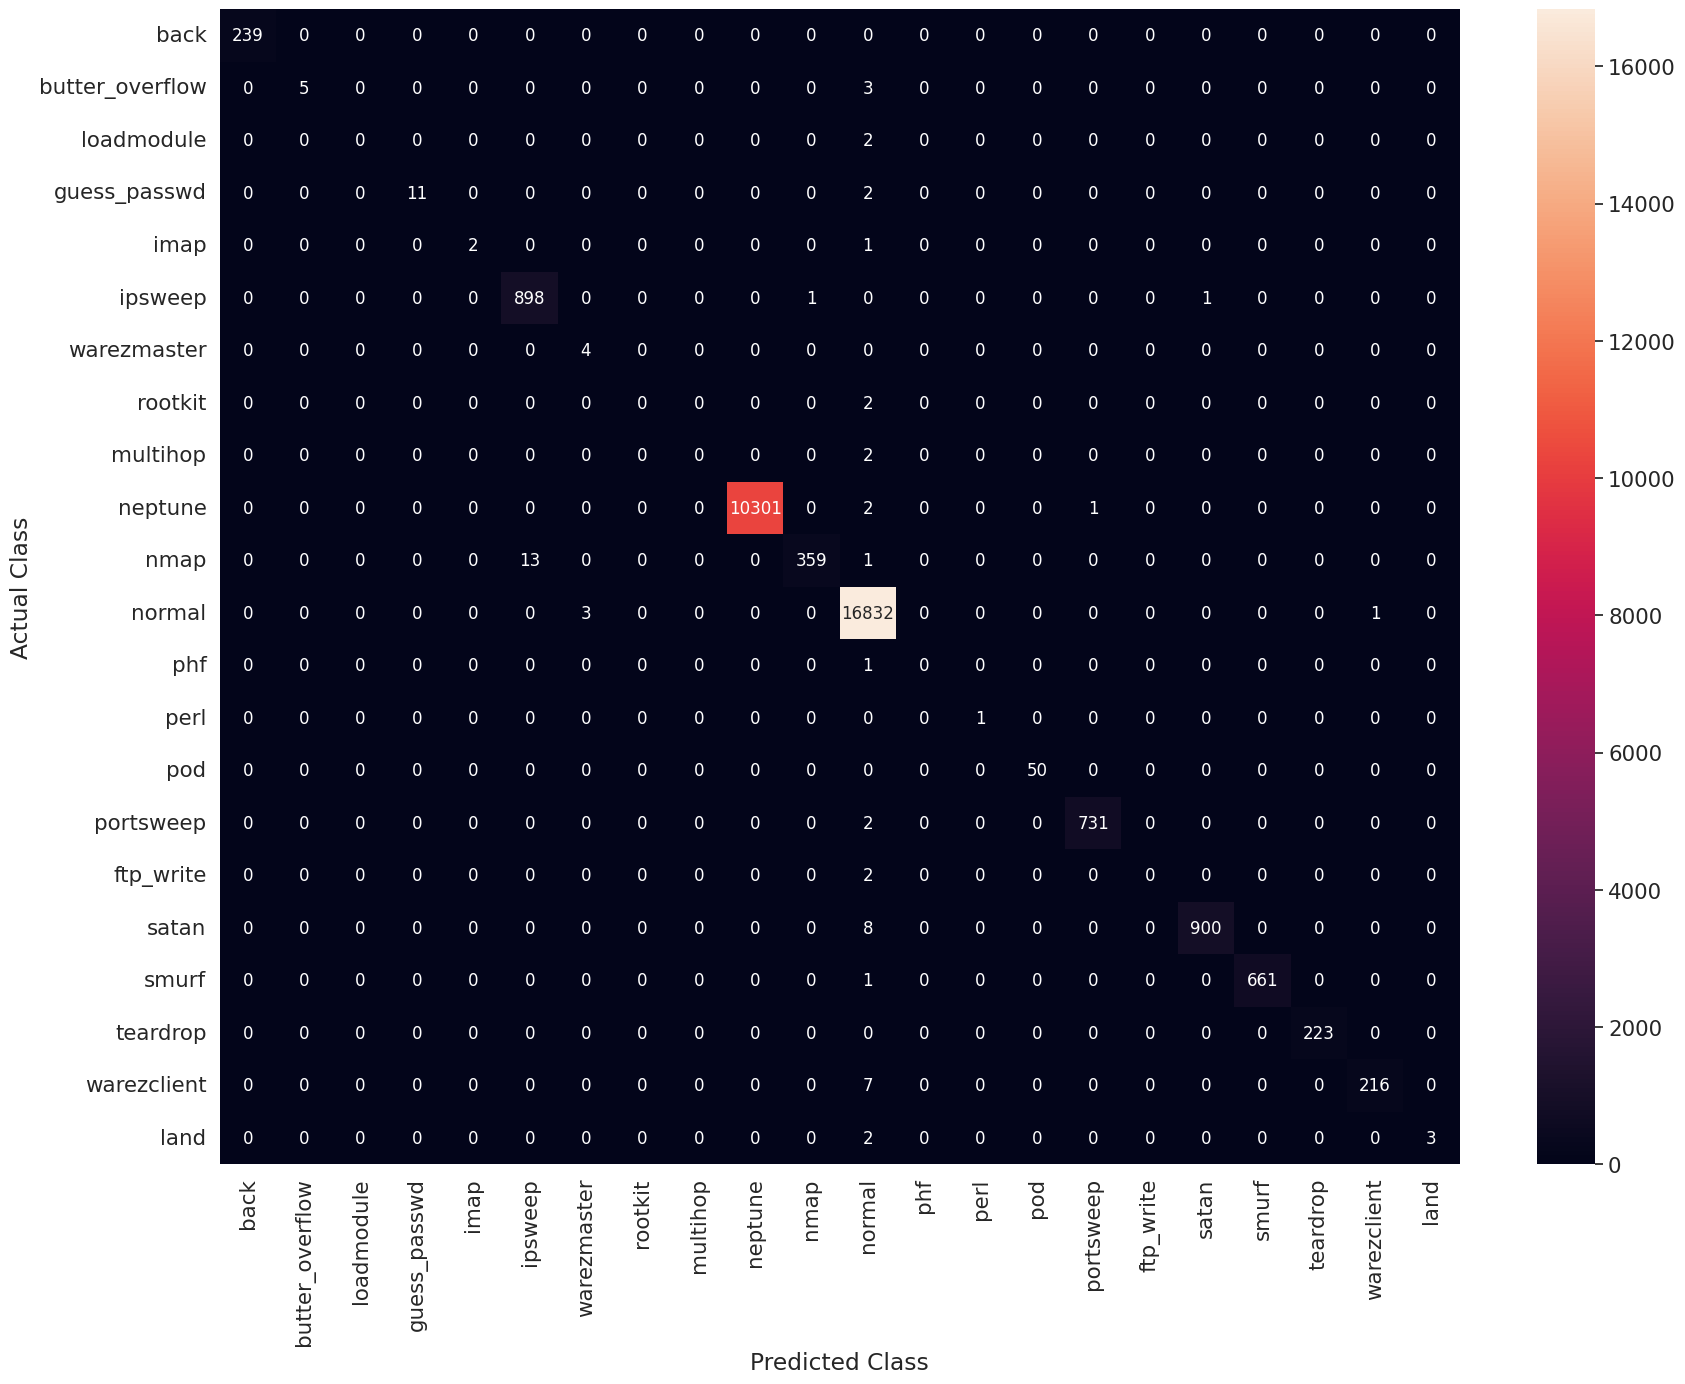

Precision score is:
0.9979185360435845
Recall score is:
0.998158379373849
F1-score is:
0.997999293460143


In [213]:
rf_grid_results_tr, rf_grid_results_test = model(rf_grid, X_train_2.toarray(), Y_train, X_test_2.toarray(), Y_test)

In [214]:
print_grid_search_attributes(rf_grid)

---------------------------
|      Best Estimator     |
---------------------------

	RandomForestClassifier(class_weight='balanced', max_depth=1000,
                       min_samples_split=5, n_estimators=500)

---------------------------
|     Best parameters     |
---------------------------
	Parameters of best estimator : 

	{'n_estimators': 500, 'min_samples_split': 5, 'max_depth': 1000}

----------------------------------
|   No of CrossValidation sets   |
----------------------------------

	Total numbre of cross validation sets: 3

---------------------------
|        Best Score       |
---------------------------

	Average Cross Validate scores of best estimator : 

	0.9977031933022152



In [215]:
rf_gs = rf_grid.best_estimator_
y_tr_pred = rf_gs.predict(X_train_2.toarray())
y_test_pred = rf_gs.predict(X_test_2.toarray())
rf_tpr_fpr_train = tpr_fpr_func(Y_train, y_tr_pred)
rf_tpr_fpr_test = tpr_fpr_func(Y_test, y_test_pred)

In [216]:
rf_grid_results_tr

{'precision': 0.9998071299773463,
 'recall': 0.999788312746748,
 'f1_score': 0.999793596669687}

In [217]:
rf_tpr_fpr_train

{'tp': 50495, 'tpr': 0.999762409171006, 'fp': 0, 'fpr': 0.0}

In [218]:
rf_grid_results_test

{'precision': 0.9979185360435845,
 'recall': 0.998158379373849,
 'f1_score': 0.997999293460143,
 'model': <function __main__.model(model_name, X_train, Y_train, X_test, Y_test)>}

In [219]:
rf_tpr_fpr_test

{'tp': 16832, 'tpr': 0.9997624138750297, 'fp': 38, 'fpr': 0.002592440987856461}

In [220]:
joblib.dump(rf_grid.best_estimator_, 'rf2.pkl')

['rf2.pkl']

In [223]:
Recall = 0.9999

    # Calculate Precision
Precision = 21956 / (21956 + 22)

    # Calculate F1 score
F1_2 = 2 * (Precision * Recall) / (Precision + Recall)
F1_2

0.9994492964370125

In [224]:
Recall =  0.9994

    # Calculate Precision
Precision = 16826 / (16826 + 38)

    # Calculate F1 score
F1_1 = 2 * (Precision * Recall) / (Precision + Recall)
F1_1

0.9985726553147979

<h5> Observation from RF_2 Classifier :- </h5>
    
    
- This RF Classifier has a lower f1-score(0.9994) compared to the RF_1 Classifier.


- True Postives = 21956


- TPR = 0.9999


- False Positives = 22


- FPR = 0.0015




- This RF Classifer has a higher TPR and higher FPR than the RF_1 model, which indicates that adding new features have improved the classification of Good connections but has also increased the misclassification of Bad category connections by some amount.


#**Deployment**

In [226]:
# !pip install streamlit -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 77.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 89.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.4 MB/s eta 0:00:00


In [227]:
# import streamlit as st
# import pandas as pd
# import joblib

In [ ]:
# # Load the Random Forest model
# with open('rf2.pkl', 'rb') as file:
#     model = pickle.load(file)

# # Define the features used by the model
# feature=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot",
#           "num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells",
#           "num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate",
#           "rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
#           "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate",
#           "dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty"]

# # Create a Streamlit app
# st.title('Intrusion Detection System')



# # dashboard title

# st.title("Real-Time / Live Data  Dashboard")

# # top-level filters

# Attack_filter = st.sidebar.selectbox("Attack", pd.unique(df['label']))

# # Get user input for selected features
# user_input = {}
# for feature in selected_features:
#     user_input[feature] = st.slider(f'Enter {feature}', min_value=0.0, max_value=1.0, step=0.01)

# # Predict upon button press
# if st.button('Predict'):
#     # Convert user input to a numpy array
#     input_array = np.array([user_input[feature] for feature in selected_features]).reshape(1, -1)

#     # Make predictions
#     prediction = model.predict(input_array)

#     # Display the prediction
#     if prediction == 0:
#         st.success('Prediction: Normal traffic (class 0)')
#     else:
#         st.error('Prediction: Anomaly detected (class 1)')